<center><img src =  ></center>

# **<center><font color='black'>K.J Somaiya College of Engineering</font></center>**

## <center><font color='red'>Engineering Final Year Project</font></center>

## <center>**<font color='purple'>InsureBuddy - An Insurance Recommender System</font></center>**


### **Author:**
### **Sujay Torvi**
### Co-Authors:
### 1. Krupen Shah
### 2. Harsh Somaiya
### 3. Tirth Desai

### Copyright© 2020 Under MIT License 

## **<font color='purple'>`Problem Statement: To process, analyse and mine the data for useful insights in insurance product recommendation and model them using various algorithms, and deploying them into an application which would provide the user with useful insurance product recommendations`</font>**

## **I. Dataset Preprocessing**

## **Source of Dataset:**
### **Zimnnat Insurance Recommendation Dataset**

URL: https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge

<br>

**<font color='red'>Important:</font>**

**<font color='purple'>Since no metadata is given for this dataset we are free to remove and impute our own attributes</font>**

### Load the dataset

In [ ]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [ ]:
from google.colab import files
u = files.upload()

Saving Train.csv to Train.csv


In [ ]:
data = pd.read_csv('Train.csv')

In [ ]:
data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
print("Training Set dimesions: ",data.shape)

Training Set dimesions:  (29132, 29)


### We have 29132 instances in our train set

In [ ]:
#Checking the number of Categories for Categorical Columns

for cols in data.columns:
    if data[cols].dtype == "O" and (cols not in ["ID","join_date"]):
        print("Variable:",cols," Number of Categories:",len(data[cols].value_counts()))

Variable: sex  Number of Categories: 2
Variable: marital_status  Number of Categories: 8
Variable: branch_code  Number of Categories: 15
Variable: occupation_code  Number of Categories: 233
Variable: occupation_category_code  Number of Categories: 6


### Viewing all the categories of the features given in our dataset

In [ ]:
data.sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
data.branch_code.unique()

array(['1X1H', 'UAOD', '748L', 'E5SW', 'XX25', 'ZFER', '30H5', '9F9T',
       'O67J', '94KC', '49BM', 'BOAS', 'X23B', 'EU3L', 'O4JC'],
      dtype=object)

In [ ]:
data.occupation_code.unique()

array(['2A7I', 'QZYX', 'BP09', 'NO3L', '0OJM', 'UJ5T', '0KID', 'SST3',
       'RUFT', 'B3QW', 'P4MD', 'BPSA', 'B8W8', 'OPVX', 'PKW3', '0B60',
       '5FPK', 'N2ZZ', '6E4H', 'F57O', 'J9SY', 'WMTK', 'YMGT', '6PE7',
       '31JW', 'SS6D', '9IM8', 'U37O', '4W0D', 'R44Q', 'JI64', 'PMAI',
       '73AC', 'ZKQ3', 'Y1WG', 'IQFS', 'I31I', 'U9RX', '7UDQ', 'VREH',
       'XHJD', 'Q6J6', '2YAO', 'TUN1', 'WSID', 'OYQF', 'Q57T', 'C8F6',
       'LQ0W', '3NHZ', 'APO0', 'IE90', 'S9KU', 'K5LB', 'F35Z', '2JHV',
       'Q0LY', '2R78', '1NFK', 'JHU5', 'SF1X', 'JSAX', 'L4PL', 'T6AB',
       '00MO', 'E39I', 'V4XX', 'GWEP', 'C1E3', '31GG', 'FSXG', 'WE7U',
       '2HLT', '6XXU', '6YZA', 'WIWP', 'H1K7', 'DPRV', 'GVZ1', '8HRZ',
       'WV7U', '5JRZ', '7KM4', '9HD1', 'RY9B', 'IJ01', '2BE6', 'XC1N',
       'RE69', 'BWBW', '44SU', '7G9M', '734F', 'HAXM', '7UHW', 'NSJX',
       'KPG9', 'OQMY', 'NQW1', 'WVQF', 'K5GV', 'INEJ', 'VZN9', 'RSN9',
       'UC7E', '0PO7', '6KYM', '1MSV', '3X46', '1H8Y', 'FJBW', 'JS7M',
      

### Since the above attribute has lot of categories, it is not useful for us, so we will purge it

In [ ]:
data.drop(['occupation_code'],axis = 1,inplace=True) #removed

In [ ]:
data.head(2)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.birth_year.unique()

array([1987, 1981, 1991, 1990, 1984, 1977, 1995, 1985, 1994, 1958, 1986,
       1959, 1966, 1965, 1967, 1968, 1963, 1974, 1983, 1989, 1976, 1979,
       1957, 1993, 1973, 1996, 2000, 1988, 1982, 1972, 1978, 1962, 1975,
       1960, 1980, 1970, 1969, 1997, 1956, 1971, 1992, 1964, 1961, 1955,
       1998, 1999, 2001, 1938, 2005, 1953, 1954, 1948, 2002, 1952, 1947,
       1950, 1932, 1946, 1951, 2011, 1936])

### We can bin the age category into few bins such as:
### 1. Post 2000 (2000-2020)
### 2. 1980's - 2000's
### 3. 1960's - 1980's
### 4. Before 1960'sz

In [ ]:
def bin_age(x):
  if(x > 1995):
    return 'Below 25'
  elif(x > 1980 and x <=1995):
    return '25-40'
  elif(x>= 1960 and x <=1980):
    return '41-60'
  elif(x < 1960):
    return 'Above 60'

In [ ]:
data.birth_year = data.birth_year.apply(bin_age)

In [ ]:
data.occupation_category_code.unique()

array(['T4MS', '90QI', '56SI', 'JD7X', 'L44T', 'AHH5'], dtype=object)

In [ ]:
data.branch_code.unique()

array(['1X1H', 'UAOD', '748L', 'E5SW', 'XX25', 'ZFER', '30H5', '9F9T',
       'O67J', '94KC', '49BM', 'BOAS', 'X23B', 'EU3L', 'O4JC'],
      dtype=object)

### We can purge joined_date also since it does not seem to make any effect on the prediction

In [ ]:
data.drop(['join_date'],axis = 1,inplace=True) #removed

In [ ]:
data.head(2)

,ID,sex,marital_status,birth_year,branch_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,F,M,25-40,1X1H,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,UAOD,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Dropping branch_code since it does not make any sense to ask a non-customer while recommending product

In [ ]:
data.drop(['branch_code'],axis = 1,inplace=True) #removed

In [ ]:
data.head(2)

,ID,sex,marital_status,birth_year,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,F,M,25-40,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Renaming all the policies of the dataset for better readability

In [ ]:
col_list = data.columns
col_list

Index(['ID', 'sex', 'marital_status', 'birth_year', 'occupation_category_code',
       'P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ',
       'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D',
       'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

In [ ]:
col_list = ['ID', 'sex', 'marital_status', 'age_group', 'occupation_category_code',\
       'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5', 'Policy 6', 'Policy 7', 'Policy 8', 'Policy 9',\
       'Policy 10', 'Policy 11', 'Policy 12', 'Policy 13', 'Policy 14', 'Policy 15', 'Policy 16', 'Policy 17', 'Policy 18',\
       'Policy 19', 'Policy 20', 'Policy 21']

In [ ]:
data.columns = col_list

In [ ]:
data.head()

,ID,sex,marital_status,age_group,occupation_category_code,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5,Policy 6,Policy 7,Policy 8,Policy 9,Policy 10,Policy 11,Policy 12,Policy 13,Policy 14,Policy 15,Policy 16,Policy 17,Policy 18,Policy 19,Policy 20,Policy 21
0,4WKQSBB,F,M,25-40,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,M,U,25-40,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,M,M,25-40,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,M,M,25-40,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0



### We shall now do some Exploratory Data Analysis by plotting graphs

### We will start off by visualizing number of users from different categories

### We can see the occupation that has largest insurance userbase above

### we shall rename the occupations as follows:

1. T4MS - Corporate Employee
2. 90QI - Self Employed
3. 56SI - Medical Professional
4. L44T - Enterpreneur
5. JD7X - Military Service
6. AHH5 - Other

#### **Here we shall explain the description of occupations of people:**

#### Corporate Employee - A person working at an Organization(Private,PSU,Govt.,other etc)

#### Self Employed - A person engaged in his own profession., eg., artist, stock broker, real estate agent, consultant,freelance jobs, etc

#### Medical Professional - Doctors working at clinics or Hospitals Come in this category

#### Military Service - Persons Engaged in Defense sectors,etc

#### Enterpreneur - Running own business (shop, MSME, small company,etc)
#### Other - any other occupation not covered above



In [ ]:
#performing label encoding on the occupation set

def encode_occupation(x):
  if(x == 'T4MS'):
    return 'Corporate Employee'
  elif(x == '90QI'):
    return 'Self Employed'
  elif(x == '56SI'):
    return 'Medical Professional'
  elif(x == 'L44T'):
    return 'Enterpreneur'
  elif(x == 'JD7X'):
    return 'Military Service'
  elif(x == 'AHH5'):
    return 'Other'

In [ ]:
data.occupation_category_code = data.occupation_category_code.apply(encode_occupation)

In [ ]:
data.occupation_category_code.value_counts()

Corporate Employee      18619
Self Employed            5552
Medical Professional     3655
Enterpreneur              628
Military Service          576
Other                     102
Name: occupation_category_code, dtype: int64

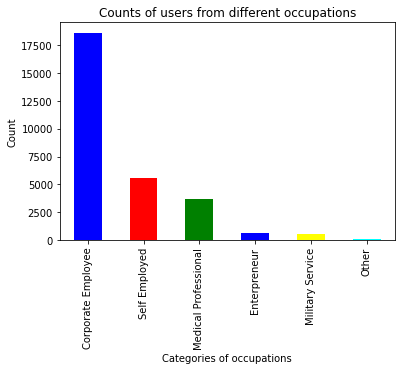

In [ ]:
data.occupation_category_code.value_counts().plot.bar(title = "Counts of users from different occupations",color=['blue', 'red', 'green', 'blue', 'yellow','cyan'] , xlabel = "Categories of occupations", ylabel = "Count")
plt.show()

### We can purge the other occupation category, since it is insignificant

In [ ]:
data = data[data.occupation_category_code != 'Other']

In [ ]:
data.occupation_category_code.value_counts()

Corporate Employee      18619
Self Employed            5552
Medical Professional     3655
Enterpreneur              628
Military Service          576
Name: occupation_category_code, dtype: int64

In [ ]:
data.head()

,ID,sex,marital_status,age_group,occupation_category_code,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5,Policy 6,Policy 7,Policy 8,Policy 9,Policy 10,Policy 11,Policy 12,Policy 13,Policy 14,Policy 15,Policy 16,Policy 17,Policy 18,Policy 19,Policy 20,Policy 21
0,4WKQSBB,F,M,25-40,Corporate Employee,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,Corporate Employee,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,M,U,25-40,Self Employed,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,M,M,25-40,Medical Professional,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,M,M,25-40,Corporate Employee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


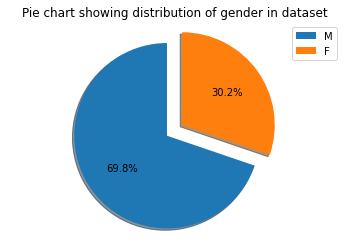

In [ ]:
data_ = data.sex.value_counts().index
counts = data.sex.value_counts().values
explode = (0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(counts, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(data_)
plt.title('Pie chart showing distribution of gender in dataset')
plt.show()

### Above shows the distribution for male and females in the dataset

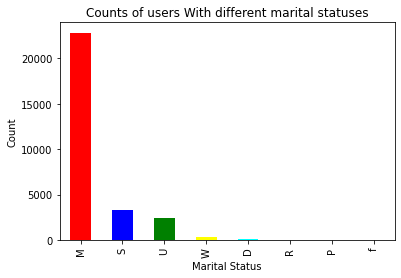

In [ ]:
data.marital_status.value_counts().plot.bar(title = "Counts of users With different marital statuses", color = ['red','blue','green','yellow','cyan','black','pink','purple'] , xlabel = "Marital Status", ylabel = "Count")
plt.show()

### Here the above legend code means the following:

#### M - Married
#### S - Marital status not known or unstated
#### U - Unmarried
#### W - Widowed
#### D - Divorced
#### P - Domestic Partner
#### R - Registered Domestic Partner
#### f - Married but not officially disclosed 

### However we wish that we only need 2 categories so we shall coalesce few of the above categories into either married or single

### Categories M, P, R, f come under married
### and others come under Single/Unmarried

In [ ]:
def marital_status(x):
  if(x == 'M' or x == 'P' or x == 'R' or x == 'f'):
    return 'M'
  else:
    return 'S'

In [ ]:
data.marital_status = data.marital_status.apply(marital_status)

In [ ]:
data.marital_status.unique()

array(['M', 'S'], dtype=object)

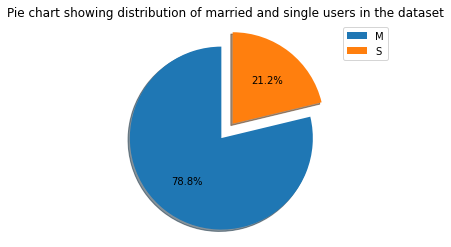

In [ ]:
data_ = data.marital_status.value_counts().index
counts = data.marital_status.value_counts().values
explode = (0.2,0) 
fig1, ax1 = plt.subplots()
ax1.pie(counts,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(data_)
plt.title('Pie chart showing distribution of married and single users in the dataset')
plt.show()

### We wish to impute another attribute in our dataset which is income - not available in our dataset earlier

### We shall use occupation as a pivotal reference to assign income to every user in the dataset

### We would need additional datapoint so that we can recommend better and find out best premium price policy for the user

### 1. A median corporate employee earns anywhere between 3 lakhs and 21 lakhs per annum 

### 2. A median self employed person earns 5 lakhs to 30 lakhs per annum

### 3. A median enterpreneur earns 7 lakhs to 60 lakhs per annum 

### 4. A median doctor/professional in medical field earns from 6 lakhs to 40 lakhs

### 5. A person in the miltary earns about 7 lakhs to 20 lakhs(they have other forms of compensations but we will consider salary as pivot for our calculations)


### Since we have used anecdotal evidence to base those figures, we have researched some sources from where we estimated the above figures

#### 1. https://www.payscale.com/research/IN/Employer=Any_Company/Salary
#### 2. https://www.payscale.com/research/IN/Employer=Self-Employed/Salary
#### 3. https://www.payscale.com/research/IN/Job=Small_Business_Owner/Salary
#### 4. https://www.glassdoor.co.in/Salary/Indian-Army-Salaries-E250868.htm

In [ ]:
data['Annual_Income'] = np.nan

In [ ]:
data = data[['ID', 'sex', 'marital_status', 'age_group', 'occupation_category_code','Annual_Income',\
       'Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5', 'Policy 6',\
       'Policy 7', 'Policy 8', 'Policy 9', 'Policy 10', 'Policy 11',\
       'Policy 12', 'Policy 13', 'Policy 14', 'Policy 15', 'Policy 16',\
       'Policy 17', 'Policy 18', 'Policy 19', 'Policy 20', 'Policy 21']]
data.head()

,ID,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5,Policy 6,Policy 7,Policy 8,Policy 9,Policy 10,Policy 11,Policy 12,Policy 13,Policy 14,Policy 15,Policy 16,Policy 17,Policy 18,Policy 19,Policy 20,Policy 21
0,4WKQSBB,F,M,25-40,Corporate Employee,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,Corporate Employee,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,M,S,25-40,Self Employed,NaN,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,M,M,25-40,Medical Professional,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,M,M,25-40,Corporate Employee,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
def compute_income():
  income = []
  age_group = data.age_group.values
  occupation_category_code = data.occupation_category_code.values
  for age,occupation in zip(age_group,occupation_category_code):
    if(occupation == 'Corporate Employee'):
      if(age == 'Below 25'):
        income.append(np.random.randint(300000,800000))
      elif(age == '25-40'):
        income.append(np.random.randint(800000,1600000))
      elif(age == '41-60'):
        income.append(np.random.randint(1200000,1800000))
      elif(age == 'Above 60'):
        income.append(np.random.randint(1600000,2100000))
    elif(occupation == 'Self Employed'):
      if(age == 'Below 25'):
        income.append(np.random.randint(400000,900000))
      elif(age == '25-40'):
        income.append(np.random.randint(1200000,2100000))
      elif(age == '41-60'):
        income.append(np.random.randint(1000000,2200000))
      elif(age == 'Above 60'):
        income.append(np.random.randint(1500000,2500000))
    elif(occupation == 'Medical Professional'):
      if(age == 'Below 25'):
        income.append(np.random.randint(600000,900000))
      elif(age == '25-40'):
        income.append(np.random.randint(1200000,2100000))
      elif(age == '41-60'):
        income.append(np.random.randint(1500000,3100000))
      elif(age == 'Above 60'):
        income.append(np.random.randint(2700000,3500000))
    elif(occupation == 'Enterpreneur'):
      if(age == 'Below 25'):
        income.append(np.random.randint(300000,900000))
      if(age == '25-40'):
        income.append(np.random.randint(1100000,1800000))
      elif(age == '41-60'):
        income.append(np.random.randint(1600000,3200000))
      elif(age == 'Above 60'):
        income.append(np.random.randint(3000000,5000000))
    elif(occupation == 'Military Service'):
      if(age == 'Below 25'):
        income.append(np.random.randint(500000,1000000))
      elif(age == '25-40'):
        income.append(np.random.randint(800000,1500000))
      elif(age == '41-60'):
        income.append(np.random.randint(1500000,2500000))
      elif(age == 'Above 60'):
        income.append(np.random.randint(1800000,3500000))
      
  return income

In [ ]:
annual_income = compute_income()

In [ ]:
data.Annual_Income = annual_income

In [ ]:
data.head()

,ID,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5,Policy 6,Policy 7,Policy 8,Policy 9,Policy 10,Policy 11,Policy 12,Policy 13,Policy 14,Policy 15,Policy 16,Policy 17,Policy 18,Policy 19,Policy 20,Policy 21
0,4WKQSBB,F,M,25-40,Corporate Employee,1371073,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,F,M,25-40,Corporate Employee,1393601,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,M,S,25-40,Self Employed,1669625,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,M,M,25-40,Medical Professional,1920861,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,M,M,25-40,Corporate Employee,1097741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
def bin_income(x):
  if(x <=500000):
    return '0-5 lac'
  elif(x > 500000 and x < 1000000):
    return '5-10 lac'
  elif(x > 1000000 and x < 2000000):
    return '10-20 lac'
  elif(x > 2000000 and x < 3000000):
    return '20-30 lac'
  elif(x > 3000000 and x < 4000000):
    return '30-40 lac'
  elif(x > 4000000 and x < 5000000):
    return '40-50 lac'

In [ ]:
data.Annual_Income = data.Annual_Income.apply(bin_income)

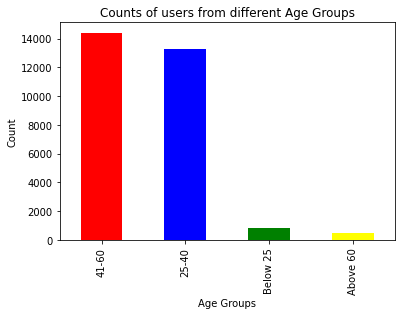

In [ ]:
data.age_group.value_counts().plot.bar(title = "Counts of users from different Age Groups", color = ['red','blue','green','yellow'], xlabel = "Age Groups", ylabel = "Count")
plt.show()

In [ ]:
data.to_excel('Final_Excel.xlsx')